<a href="https://colab.research.google.com/github/kacpercierpiak/AED_LAB/blob/main/AED_L_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALGORYTMY I EKSPLORACJA DANYCH**
# *LAB4 - Uczenie z nadzorem*

In [50]:
import requests, zipfile, io
rootPath = './LAB4'
url='https://archive.ics.uci.edu/ml/machine-learning-databases/00341/HAPT%20Data%20Set.zip'
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall(rootPath)


##Zadanie 1

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
X_train = np.genfromtxt(rootPath+'/Train/X_train.txt',delimiter=' ')
y_train = np.genfromtxt(rootPath+'/Train/y_train.txt',delimiter=' ')
X_test = np.genfromtxt(rootPath+'/Test/X_test.txt',delimiter=' ')
y_test = np.genfromtxt(rootPath+'/Test/y_test.txt',delimiter=' ')


##Zadanie 2
Zbuduj modele predykcyjne na podstawie następujących algorytmów zakładając domyślne parametry:

###SVM

In [3]:
from sklearn import svm, metrics
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
svm_pred = clf.predict(X_test)

###KNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

### DecisionTree

In [27]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)
tree_pred = dtree.predict(X_test)

###RandomForest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rforest=RandomForestClassifier()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)

##Zadanie 3
Na podstawie zdefiniowanych metryk oceny klasyfikatorów oceń skuteczność klasyfikacji
algorytmów z zadania 2

In [55]:
def model_desc(pred):
             conf = metrics.confusion_matrix(y_test, pred)
             plt.imshow(conf, interpolation='nearest')
             plt.show()
             print("Accuracy: ",metrics.accuracy_score(y_test, pred))
             print("Recall: ", metrics.recall_score(y_test, pred,average='macro'))
             print("F1: ", metrics.f1_score(y_test, pred,average='macro'))
             fpr, tpr, thresholds = metrics.roc_curve(y_test, pred, pos_label=2)
             print("AUC: ",metrics.auc(fpr, tpr) )

###SVM

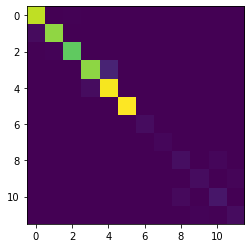

Accuracy:  0.9519291587602783
Recall:  0.8560427418375562
F1:  0.8600533686689769
AUC:  0.18280325785172089


In [56]:
model_desc(svm_pred)

###KNN

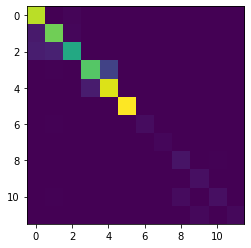

Accuracy:  0.8848829854522454
Recall:  0.8103677778546495
F1:  0.8135337752124174
AUC:  0.20254232674614844


In [57]:
model_desc(knn_pred)

### DecisionTree


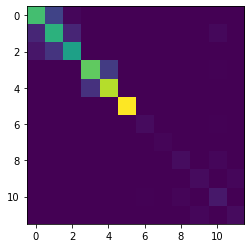

Accuracy:  0.8105629348513599
Recall:  0.7299260763924506
F1:  0.7336199631318014
AUC:  0.2054895574696184


In [59]:
model_desc(tree_pred)

###RandomForest

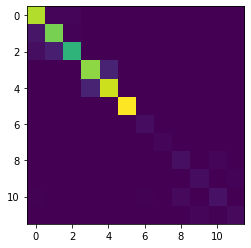

Accuracy:  0.9089184060721063
Recall:  0.8095399883236215
F1:  0.8119743272598031
AUC:  0.1915703915150052


In [60]:
model_desc(rforest_pred)

##Zadanie 4
Dokonaj wyboru najlepszego algorytmu klasyfikacji na podstawie kros-walidacji (CV) dla 5
podprób. Jako rezultat zwróć następujące parametry:
- Wartości średniej z wyników klasyfikacji
- Średniego odchylenia standardowego z wyników klasyfikacji

In [ ]:
from sklearn.model_selection import KFold 
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])
kf = KFold(n_splits=5) 
kf.get_n_splits(X)

###SVM

In [146]:
acc_arr = []

for train_index, test_index in kf.split(X):       
     clf = svm.SVC(kernel='linear')
     clf.fit(X[train_index], y[train_index])
     tmp_pred = clf.predict(X[test_index]) 
     acc_arr.append(metrics.accuracy_score(y[test_index], tmp_pred)) 
print("Avarage accuracy",np.average(acc_arr))     
print("Std: ", np.std(acc_arr)) 


Avarage accuracy 0.9730993779847207
Std:  0.0047999238463292265


###kNN

In [158]:
acc_arr = []

for train_index, test_index in kf.split(X):   
     knn_model = KNeighborsClassifier()
     knn_model.fit(X[train_index], y[train_index])
     tmp_pred = knn_model.predict(X[test_index]) 
     acc_arr.append(metrics.accuracy_score(y[test_index], tmp_pred)) 
print("Avarage accuracy",np.average(acc_arr))     
print("Std: ", np.std(acc_arr)) 

Avarage accuracy 0.9451010277593422
Std:  0.006785704433843984


###Decision Tree

In [159]:
acc_arr = []

for train_index, test_index in kf.split(X):   
     dtree = tree.DecisionTreeClassifier()
     dtree.fit(X[train_index], y[train_index])
     tmp_pred = dtree.predict(X[test_index]) 
     acc_arr.append(metrics.accuracy_score(y[test_index], tmp_pred)) 
print("Avarage accuracy",np.average(acc_arr))     
print("Std: ", np.std(acc_arr)) 

Avarage accuracy 0.905481899585672
Std:  0.010827261347169976


###Random Forest

In [160]:
acc_arr = []

for train_index, test_index in kf.split(X):   
     rforest=RandomForestClassifier()
     rforest.fit(X[train_index], y[train_index])
     tmp_pred = rforest.predict(X[test_index])
     acc_arr.append(metrics.accuracy_score(y[test_index], tmp_pred)) 
print("Avarage accuracy",np.average(acc_arr))     
print("Std: ", np.std(acc_arr)) 

Avarage accuracy 0.9607471301667989
Std:  0.004700915882018353


###Podsumowanie
SVM oraz Random forest mają podobne wyniki dokładności oraz odchylenia standardowego. SVM wykonuje się znacznie szybciej dlatego też został uznany za najlepszy algorytm na podstawie CV

##Zadanie 5
Znajdź optymalne wartości parametrów klasyfikacji (możesz korzystać z dowolnych technik)
dla wykorzystywanych klasyfikatorów tak aby skuteczność trenowania była maksymalna.
Następnie na podstawie wyselekcjonowanego algorytmu wraz ze zdefiniowanymi
parametrami zwróć wynik testowania algorytmu na zbiorze testowym.

###SVM

Text(0, 0.5, 'Error Rate')

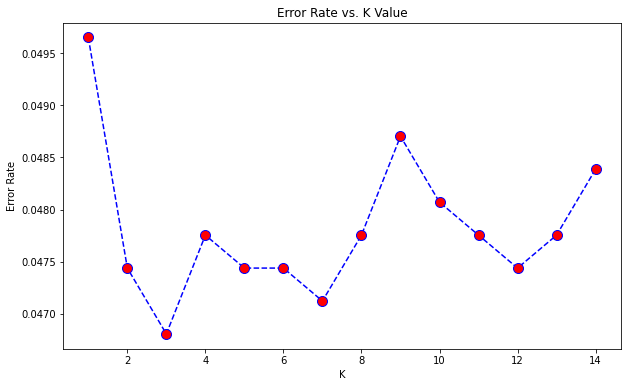

In [23]:
error_rate = []
K = range(1,15)
for k in K:
    clf = svm.SVC(kernel='linear',C=k/10)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate, color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

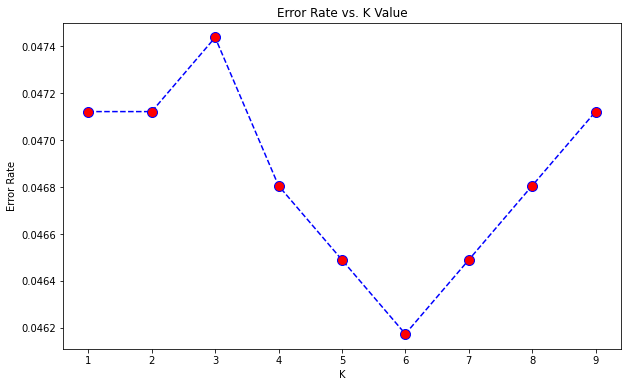

In [22]:
error_rate = []
K = range(1,10)
for k in K:
    clf = svm.SVC(kernel='linear',C=k/100+0.2)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate, color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Optymalna wartość parametru C wynosi 0.26

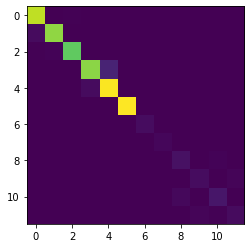

Accuracy:  0.9538266919671095
Recall:  0.8674197877202063
F1:  0.869367370047223
AUC:  0.18223874344062657


In [61]:
clf = svm.SVC(kernel='linear',C=0.26)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
model_desc(pred)

###kNN

Text(0, 0.5, 'Error Rate')

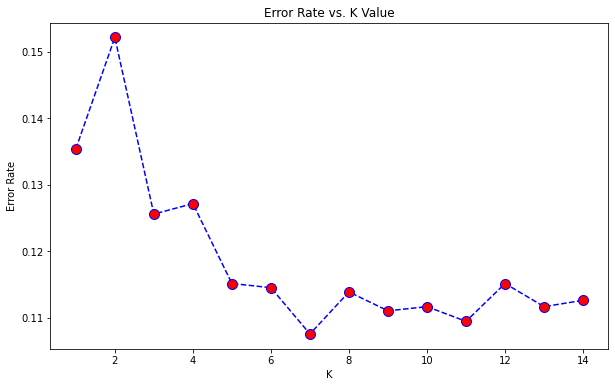

In [25]:
error_rate = []
K = range(1,15)
for k in K:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    pred = knn_model.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate, color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Optymalna wartość n_neighbors wynosi 7

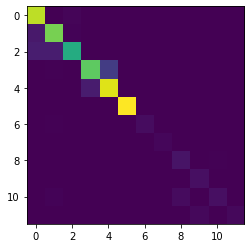

Accuracy:  0.8924731182795699
Recall:  0.8145639740676817
F1:  0.8186905016803658
AUC:  0.20170640358953848


In [62]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)
pred = knn_model.predict(X_test)
model_desc(pred)

###Decision Tree

Text(0, 0.5, 'Error Rate')

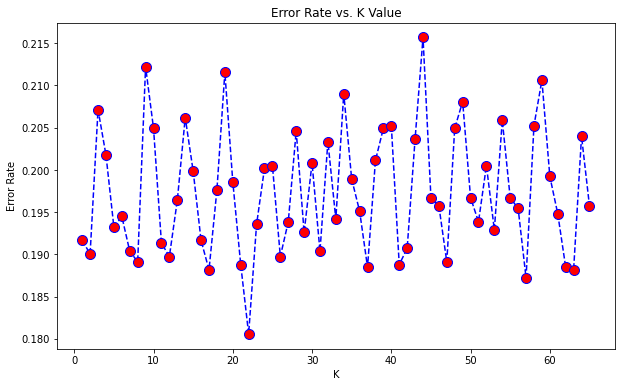

In [39]:
error_rate = []
K = range(2,15)
I = range(1,6)
for k in K:
    for i in I:
        dtree = tree.DecisionTreeClassifier(min_samples_split=k, min_samples_leaf=i)
        dtree.fit(X_train, y_train)
        pred = dtree.predict(X_test)
        error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,66),error_rate, color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Optymalna wartości 
- min_sample_split = 3 
- min_sample_leaf = 2

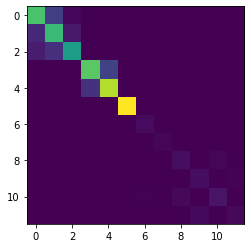

Accuracy:  0.8159392789373814
Recall:  0.7329582015914706
F1:  0.7440475203062767
AUC:  0.18818448851680647


In [63]:
dtree = tree.DecisionTreeClassifier(min_samples_split=3, min_samples_leaf=2)
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
model_desc(pred)

######Random Forest

Text(0, 0.5, 'Error Rate')

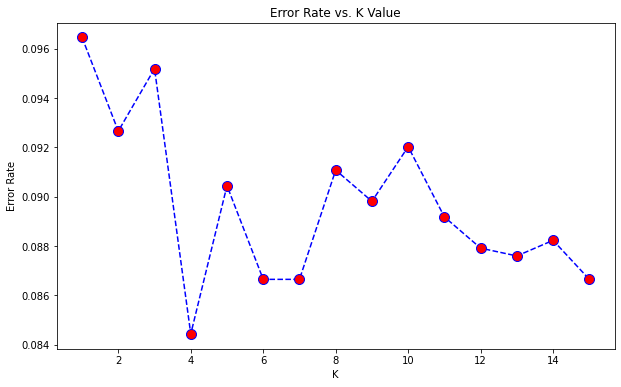

In [54]:
error_rate = []
K = range(1,16)
for k in K:
    rforest=RandomForestClassifier(n_estimators=k*25, min_samples_split=3,min_samples_leaf=2)
    rforest.fit(X_train, y_train)
    pred = rforest.predict(X_test)    
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,16),error_rate, color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Optymalna wartosc n_estimators = 100

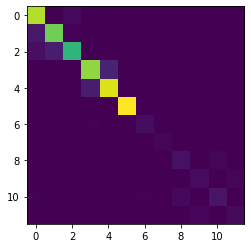

Accuracy:  0.9127134724857685
Recall:  0.8013621120744711
F1:  0.8117973057563086
AUC:  0.19000190143917642


In [64]:
rforest=RandomForestClassifier(n_estimators=100, min_samples_split=3,min_samples_leaf=2)
rforest.fit(X_train, y_train)
pred = rforest.predict(X_test)
model_desc(pred)

###Podsumowanie
Najlepiej wypadł algorytm SVM z dokładnością 95%

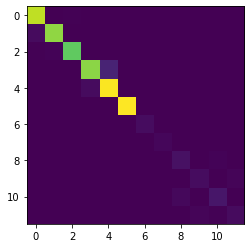

Accuracy:  0.9538266919671095
Recall:  0.8674197877202063
F1:  0.869367370047223
AUC:  0.18223874344062657


array([5., 5., 5., ..., 2., 2., 2.])

In [71]:
clf = svm.SVC(kernel='linear',C=0.26)
clf.fit(X_train, y_train)
final_pred = clf.predict(X_test)
model_desc(final_pred)

##Zadanie 6
Zaprezentuj graficznie wynik klasyfikacji i testowania wyselekcjonowanego algorytmu:

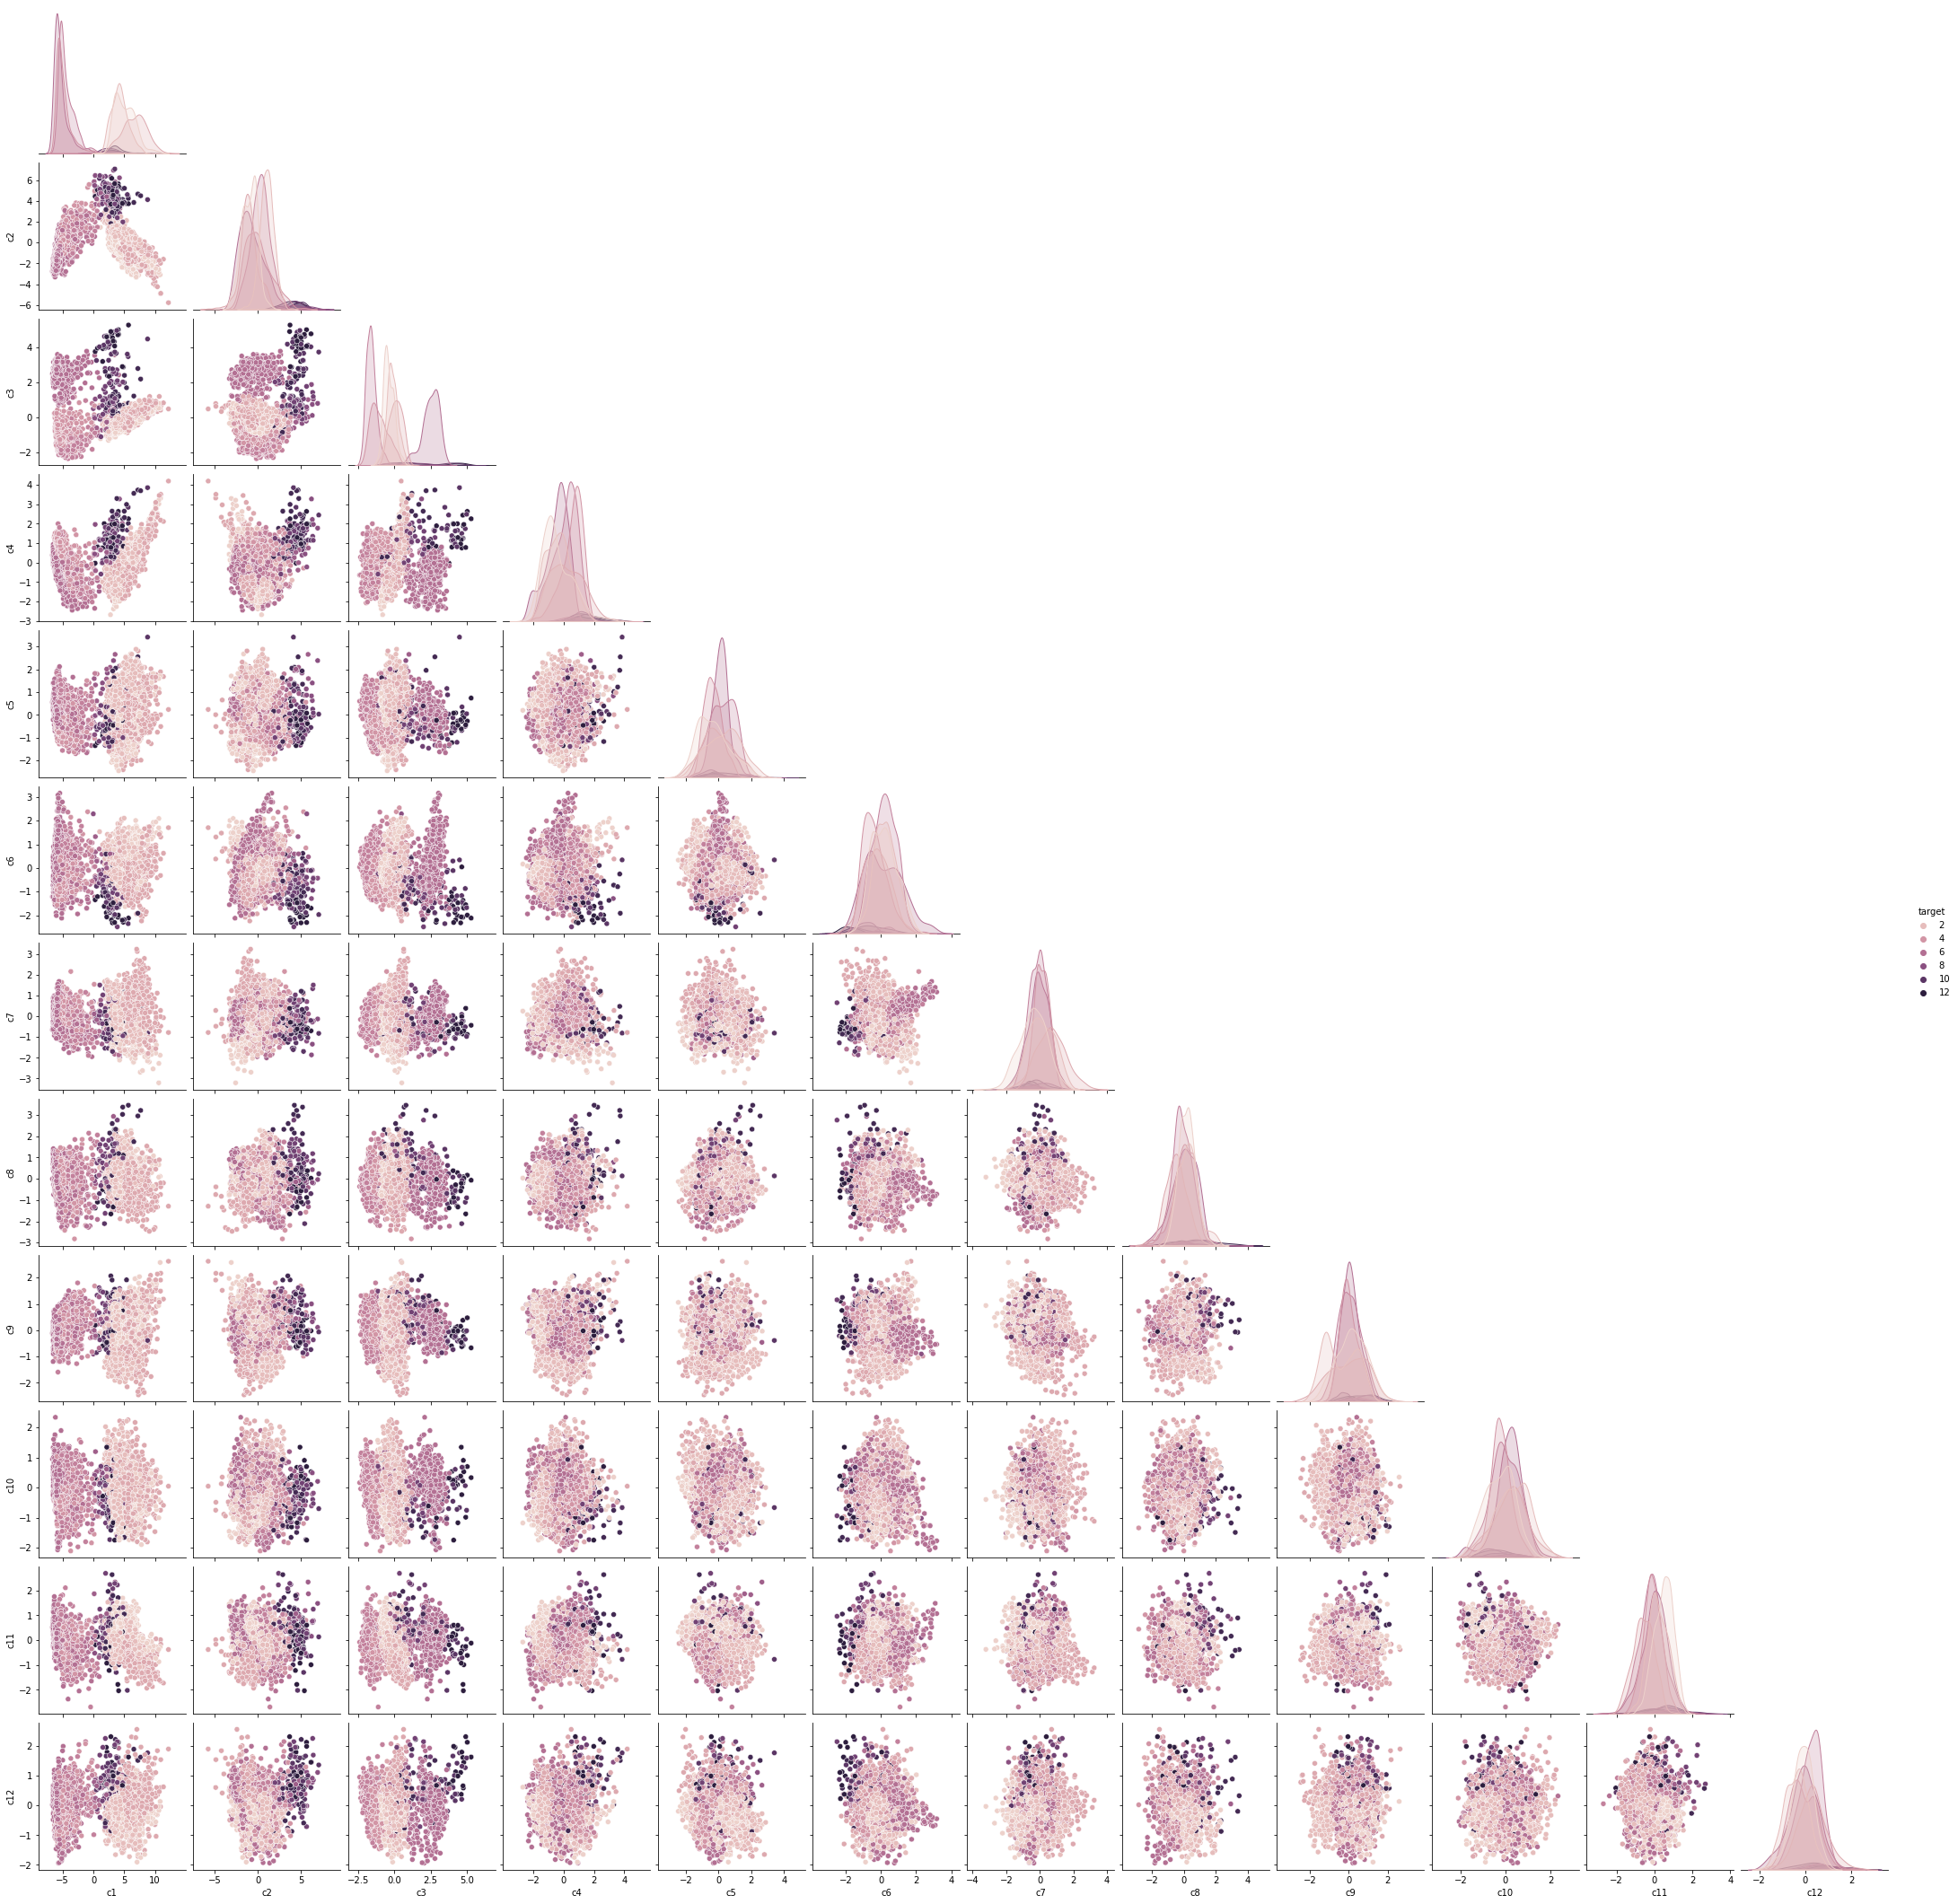

In [89]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=12)
pca_data = pca.fit_transform(X_test)

ac_data = np.insert(pca_data,pca_data.shape[1], final_pred, axis = 1)
df = pd.DataFrame(data=ac_data, columns=["c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9", "c10", "c11", "c12", "target"])
sns.pairplot(df, hue='target',corner=True)
